In [1]:
'''
- mac shortcuts
    option + arrow_key_left -> move left one word
    option + arrow_key_right -> move right one word
    command + arrow_key_left -> move to start of first word on line
    command + arrow_key_right -> move to end of last word on line
    fn + backspace -> delete
- vscode shortcuts
    when a cell is selected:
        control + enter -> execute current cell
        shift + enter -> execute current cell and select cell below
        option + enter -> execute current cell, inset new cell below and select new cell below
        control + shift + '-' -> split current cell at the curse
    when a cell is not selected:
        a -> insert code cell above current cell
        b -> insert code cell below current cell
        m -> make the cell a markdown cell
        y -> make the cell a code cell
        d, d -> delete the currently selected cell
        z -> undo the last cell operation
    general vscode shortcuts:
        command + s -> save the current file
        command + z -> undo the last action
        command + shift + z -> redo the last undone action
        command + shift + p -> open the command palette
        command  + b -> toggle the sidebar visibility
        control + '`' -> toggle the integrated terminal
- Conda environment
    install conda and set up an environment to work in
    terminal commands:
        'conda activate [ENV]' -> activate pre established environment
        'conda install [PACKAGE]' -> install package to environment from the default channel (maintained by Anaconda)
        'conda config --show channels' -> show a list of the configured channels
        'conda install -c conda-forge [PACKAGE]' -> install package to envirnment from conda-forge channel (-c flag specified the channel you want to use)
- setting up Jupyter notebook
- git
    terminal commands:
        'git config --global user.name "[GITHUB USERNAME]"' -> set the username for the global configuration
        'git confit --global user.email "ID+username@users.noreply.github.com"' -> set email for global configuration to pseudonymized email
        'git commit --amend --reset-author' -> fix the identity of whoever made a commit
        'git push --set-upstream origin [BRANCH]' -> push commits to remote repository and set remote branch as default tracking branch
'''


'\n- mac shortcuts\n    option + arrow_key_left -> move left one word\n    option + arrow_key_right -> move right one word\n    command + arrow_key_left -> move to start of first word on line\n    command + arrow_key_right -> move to end of last word on line\n    fn + backspace -> delete\n- vscode shortcuts\n    when a cell is selected:\n        control + enter -> execute current cell\n        shift + enter -> execute current cell and select cell below\n        option + enter -> execute current cell, inset new cell below and select new cell below\n        control + shift + \'-\' -> split current cell at the curse\n    when a cell is not selected:\n        a -> insert code cell above current cell\n        b -> insert code cell below current cell\n        m -> make the cell a markdown cell\n        y -> make the cell a code cell\n        d, d -> delete the currently selected cell\n        z -> undo the last cell operation\n    general vscode shortcuts:\n        command + s -> save the cu

# Practical Deep Learning for Non-Coders (like me)

[Lesson 1: Practical Deep Learning for Coders 2022](https://www.youtube.com/watch?v=8SF_h3xF3cE)

In [24]:
# import all the required functions from fastbook such as:
    # search_images_ddg()
    # download_url()
    # download_images()
    # Path()
    # Image()
from fastbook import *

/Users/jamesbyers/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/fastbook/__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


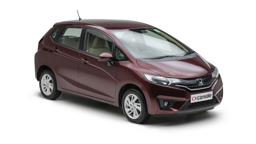

In [93]:
# download and view single image from duckduck go
def download_single_image(term, n_images, show_progress=False, show_image=False):
    dest = Path(f'{term}.jpg')

    url = search_images_ddg(term, max_images=n_images)
    
    download_url(url[-1], dest, show_progress=show_progress)
    
    return Image.open(dest)

image = download_single_image('honda jazz', 2)
image.to_thumb(256, 256)


In [86]:
# download dataset
def download_dataset(terms, folder, n_images):
    if not path.exists():
        for term in terms:
            dest = path/term
            dest.mkdir(exist_ok=True, parents=True)
            results = search_images_ddg(term, max_images=n_images)
            download_images(dest, urls=results[:])
            resize_images(dest, max_size=400, dest=dest)

terms = ('formula 1 car', 'honda jazz')
path = Path('which_car')
download_dataset(terms, path, 100)

In [87]:
# unlink broken files
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);


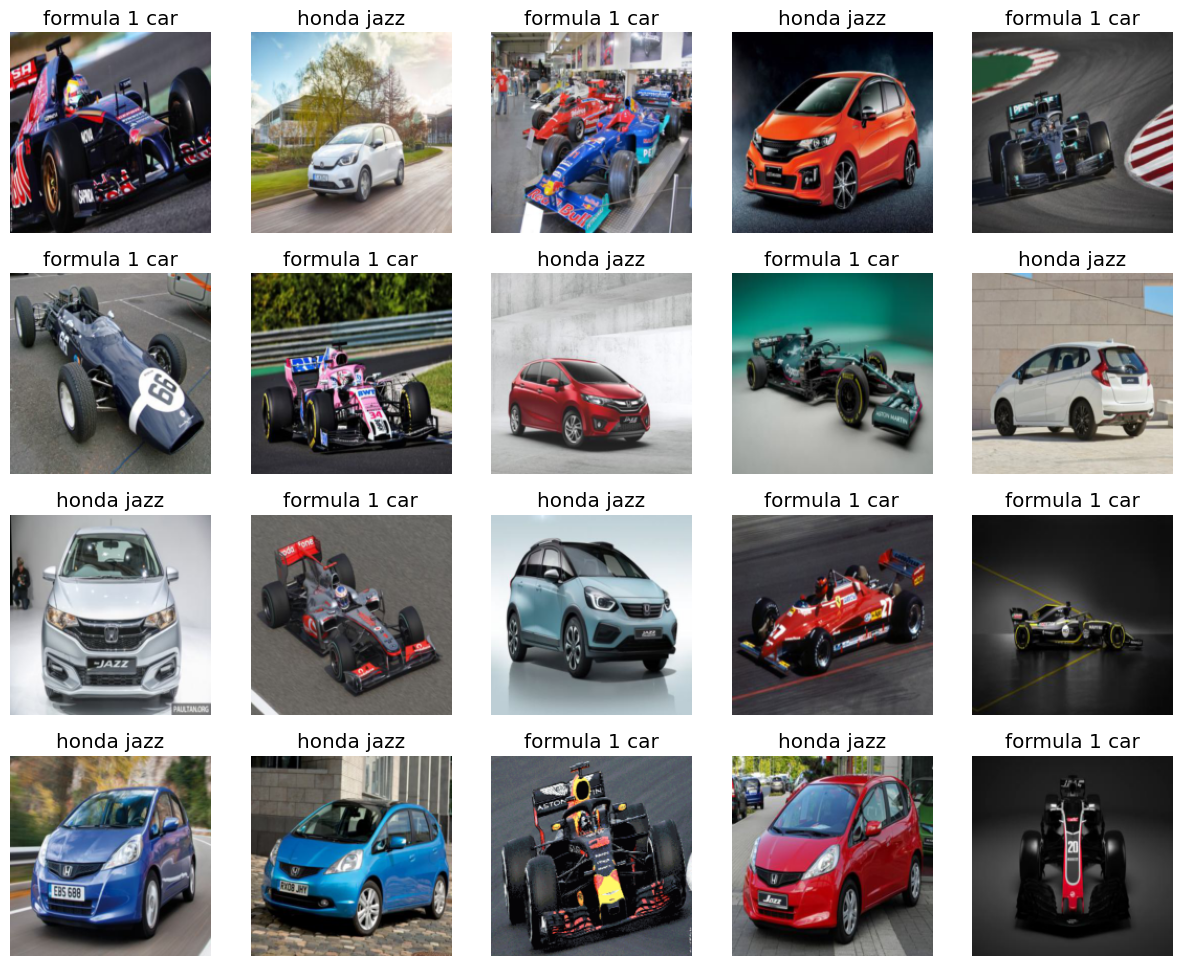

In [88]:
# create DataBlock and show batch
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=20)

In [94]:
# train vision learner model
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.329876,1.581212,0.472222,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.443948,0.303440,0.194444,00:00
1,0.247330,0.020024,0.000000,00:00
2,0.173733,0.005304,0.000000,00:00


In [95]:
# test model with inference on bird.jpg image
cat, cat_idx, probs = learn.predict(PILImage.create('honda jazz.jpg'))
print(f'{cat}: {probs[cat_idx]:.4f}')

honda jazz: 0.9997
